In [7]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# 1. Memuat Dataset
# Dataset Titanic tersedia secara built-in di library Seaborn
titanic = sns.load_dataset('titanic')

# Menampilkan 5 baris pertama dataset untuk memahami struktur data
print("5 Baris Pertama Dataset Titanic:")
print(titanic.head())
print(titanic.tail())


# Buat kolom baru 'sex_numeric'
# Ubah 'male' menjadi 1 dan 'female' menjadi 0
titanic['sex_numeric'] = titanic['sex'].map({'male': 1, 'female': 0})

# Tampilkan beberapa baris pertama untuk verifikasi
print(titanic[['sex', 'sex_numeric']].head())

# Menampilkan 5 baris pertama dataset untuk memahami struktur data
print("5 Baris Pertama Dataset Titanic:")
print(titanic.head())



5 Baris Pertama Dataset Titanic:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
     survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  1

In [9]:
# Mendapatkan daftar dataset yang tersedia di Seaborn
datasets = sns.get_dataset_names()

# Menampilkan daftar dataset
for dataset in datasets:
    print(dataset)

anagrams
anscombe
attention
brain_networks
car_crashes
diamonds
dots
dowjones
exercise
flights
fmri
geyser
glue
healthexp
iris
mpg
penguins
planets
seaice
taxis
tips
titanic


In [10]:
# 2. Penanganan Missing Values pada Kolom 'age'
# Mengisi nilai NaN di 'age' dengan median umur berdasarkan 'pclass' (kelas penumpang)
# Ini lebih akurat daripada menggunakan median keseluruhan.
titanic['age'] = titanic.groupby('pclass')['age'].transform(lambda x: x.fillna(x.median()))

# Menampilkan jumlah data sebelum menghilangkan outlier
print(f"Jumlah baris sebelum menghilangkan outlier: {len(titanic)}")

Jumlah baris sebelum menghilangkan outlier: 891


In [11]:
# 3. Fungsi untuk Menghilangkan Outlier menggunakan IQR
def remove_outliers_iqr(df, column):
    """
    Menghilangkan outlier dari sebuah kolom pada DataFrame menggunakan metode IQR.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data yang berada dalam rentang (tidak termasuk outlier)
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Menghilangkan outlier dari kolom 'fare'
titanic_no_outliers = remove_outliers_iqr(titanic, 'fare')
print(f"Jumlah baris setelah menghilangkan outlier pada 'fare': {len(titanic_no_outliers)}")

# Menghilangkan outlier dari kolom 'age' dari data yang sudah difilter
titanic_no_outliers = remove_outliers_iqr(titanic_no_outliers, 'age')
print(f"Jumlah baris setelah menghilangkan outlier pada 'age': {len(titanic_no_outliers)}")

# Dataset 'titanic_no_outliers' sekarang adalah versi bersih tanpa outlier di kolom 'age' dan 'fare'
print("\n5 Baris Pertama Dataset Setelah Outlier Dihilangkan:")
print(titanic_no_outliers.head())

Jumlah baris setelah menghilangkan outlier pada 'fare': 775
Jumlah baris setelah menghilangkan outlier pada 'age': 721

5 Baris Pertama Dataset Setelah Outlier Dihilangkan:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   
5         0       3    male  24.0      0      0   8.4583        Q  Third   

     who  adult_male deck  embark_town alive  alone  sex_numeric  
0    man        True  NaN  Southampton    no  False            1  
2  woman       False  NaN  Southampton   yes   True            0  
3  woman       False    C  Southampton   yes  False            0  
4    man        True  NaN  Southampton    no   True            1  
5    man        True  NaN   Queenst

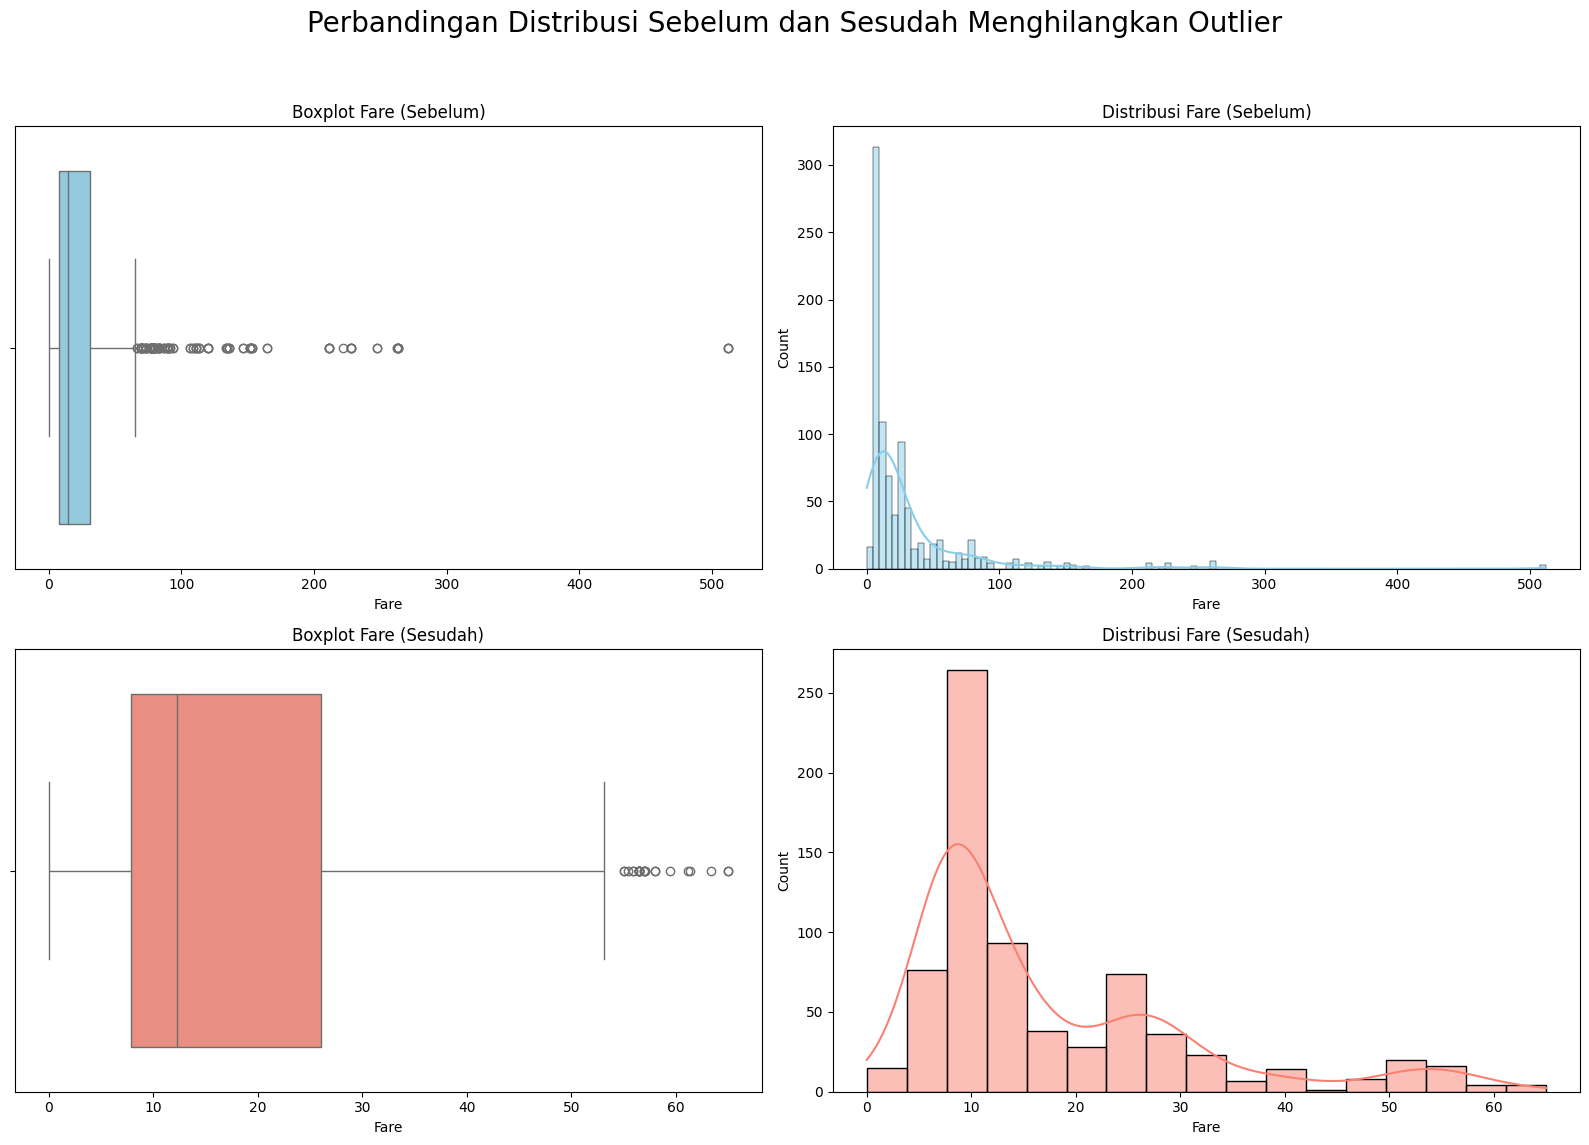

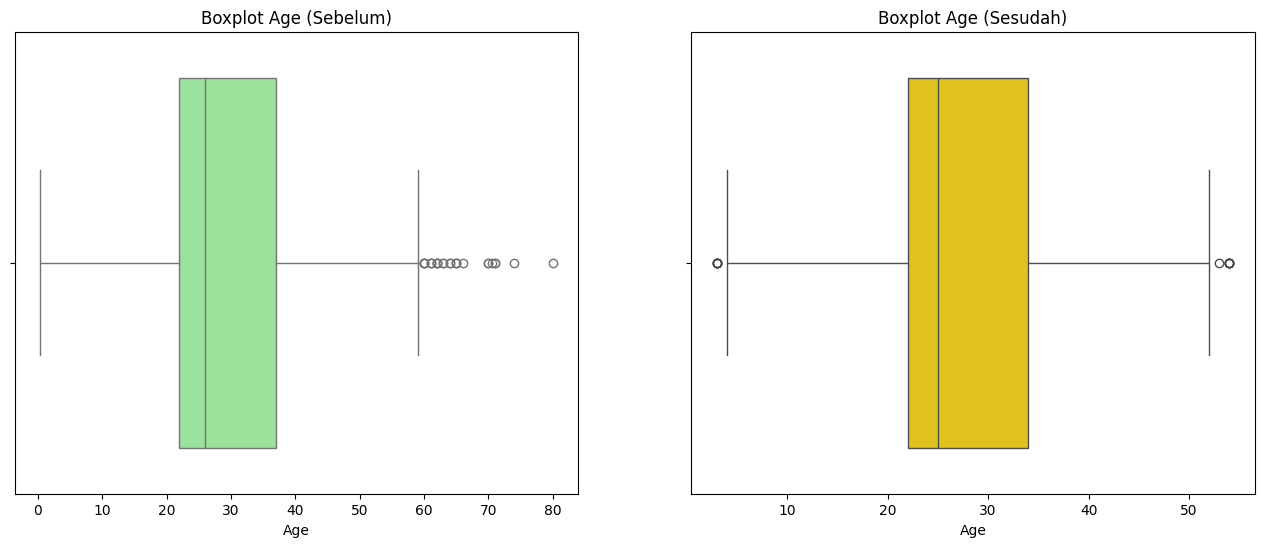

In [12]:
# 4. Visualisasi Perbandingan Sebelum dan Sesudah
# Membuat layout plot 2x2 untuk perbandingan
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Perbandingan Distribusi Sebelum dan Sesudah Menghilangkan Outlier', fontsize=20)

# ----- SEBELUM MENGHILANGKAN OUTLIER -----

# Boxplot untuk 'fare' (Sebelum)
sns.boxplot(ax=axes[0, 0], x=titanic['fare'], color='skyblue')
axes[0, 0].set_title('Boxplot Fare (Sebelum)')
axes[0, 0].set_xlabel('Fare')

# Histogram/Distplot untuk 'fare' (Sebelum)
sns.histplot(ax=axes[0, 1], data=titanic, x='fare', kde=True, color='skyblue')
axes[0, 1].set_title('Distribusi Fare (Sebelum)')
axes[0, 1].set_xlabel('Fare')


# ----- SESUDAH MENGHILANGKAN OUTLIER -----

# Boxplot untuk 'fare' (Sesudah)
sns.boxplot(ax=axes[1, 0], x=titanic_no_outliers['fare'], color='salmon')
axes[1, 0].set_title('Boxplot Fare (Sesudah)')
axes[1, 0].set_xlabel('Fare')

# Histogram/Distplot untuk 'fare' (Sesudah)
sns.histplot(ax=axes[1, 1], data=titanic_no_outliers, x='fare', kde=True, color='salmon')
axes[1, 1].set_title('Distribusi Fare (Sesudah)')
axes[1, 1].set_xlabel('Fare')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ----- Visualisasi untuk Kolom 'age' -----
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot 'age' (Sebelum)
sns.boxplot(ax=axes[0], x=titanic['age'], color='lightgreen')
axes[0].set_title('Boxplot Age (Sebelum)')
axes[0].set_xlabel('Age')

# Boxplot 'age' (Sesudah)
sns.boxplot(ax=axes[1], x=titanic_no_outliers['age'], color='gold')
axes[1].set_title('Boxplot Age (Sesudah)')
axes[1].set_xlabel('Age')

plt.show()

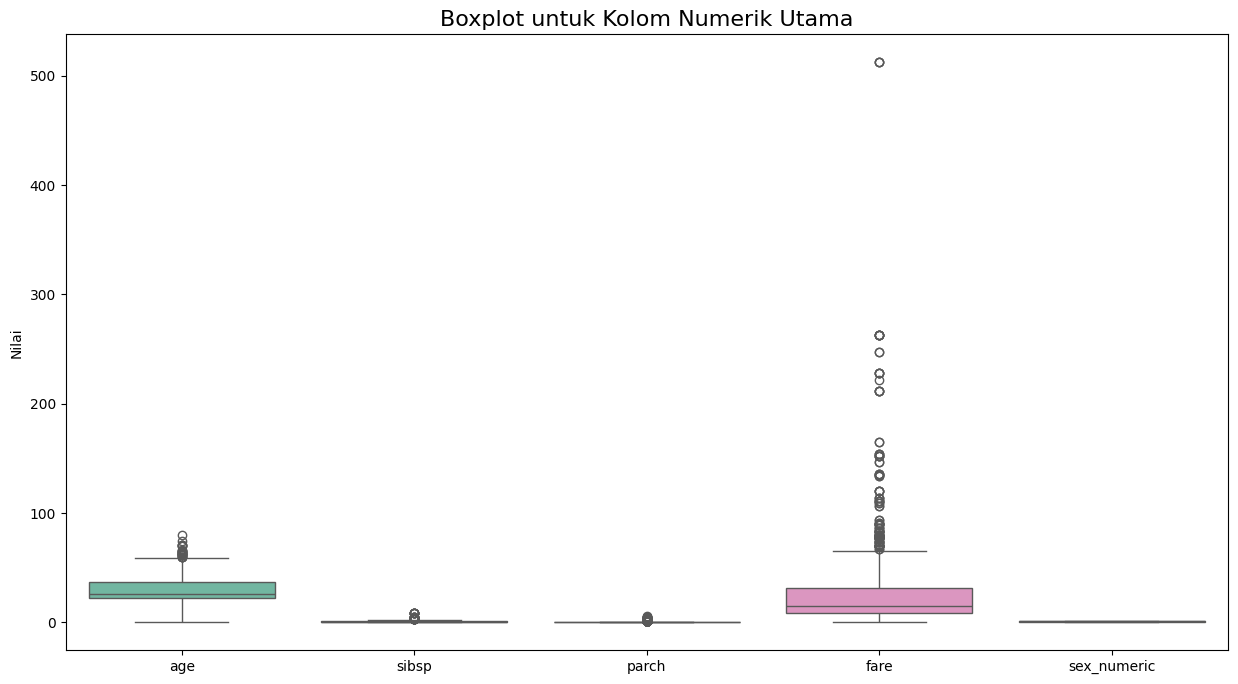

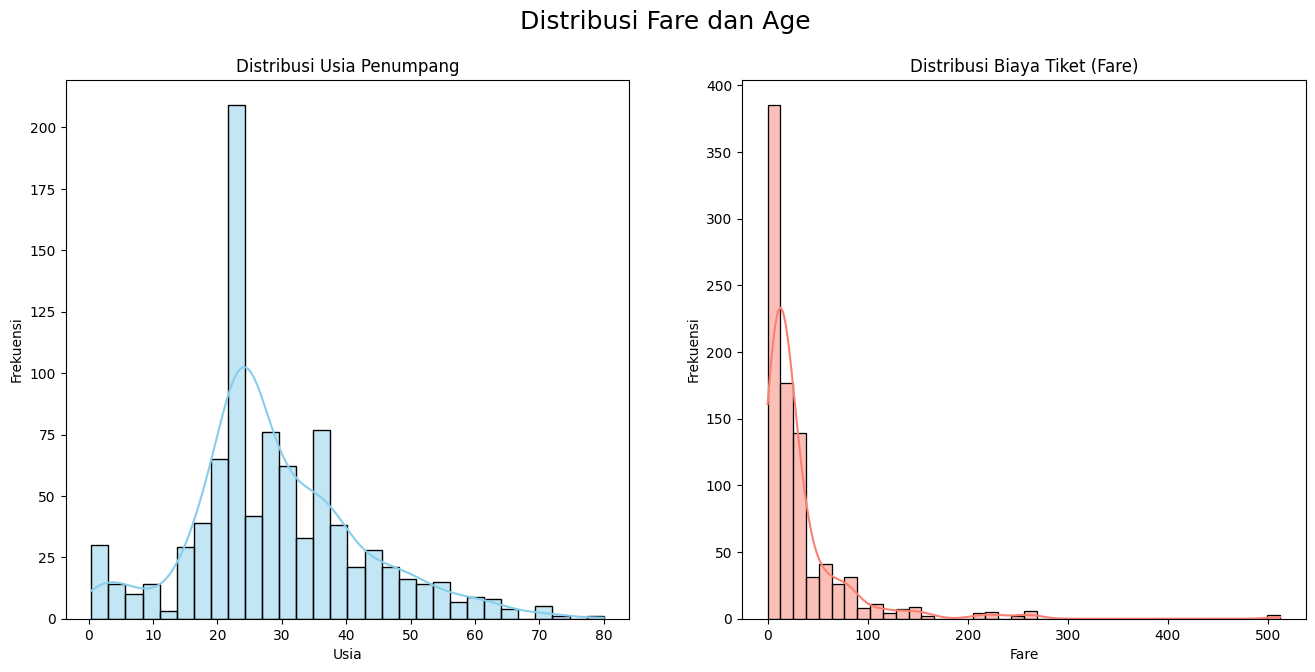

In [13]:
# 5. Visualisasi Data Numerik
# --- Boxplot untuk semua kolom numerik ---
numeric_cols = titanic.select_dtypes(include=np.number).columns.tolist()
# Kita hapus 'survived' dan 'pclass' karena lebih bersifat kategorikal meskipun tipenya numerik
numeric_cols.remove('survived')
numeric_cols.remove('pclass')

plt.figure(figsize=(15, 8))
sns.boxplot(data=titanic[numeric_cols], palette='Set2')
plt.title('Boxplot untuk Kolom Numerik Utama', fontsize=16)
plt.ylabel('Nilai')
plt.savefig('boxplot_numerik.png')
plt.show()

# --- Distribusi Fare dan Age ---
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Distribusi Fare dan Age', fontsize=18)

# Histogram & Distplot untuk Age
sns.histplot(ax=axes[0], data=titanic, x='age', kde=True, bins=30, color='skyblue')
axes[0].set_title('Distribusi Usia Penumpang')
axes[0].set_xlabel('Usia')
axes[0].set_ylabel('Frekuensi')

# Histogram & Distplot untuk Fare
sns.histplot(ax=axes[1], data=titanic, x='fare', kde=True, bins=40, color='salmon')
axes[1].set_title('Distribusi Biaya Tiket (Fare)')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frekuensi')

plt.savefig('distribusi_fare_age.png')
plt.show()

/tmp/ipython-input-1610702155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], data=titanic, x='class', palette='viridis', order=['First', 'Second', 'Third'])


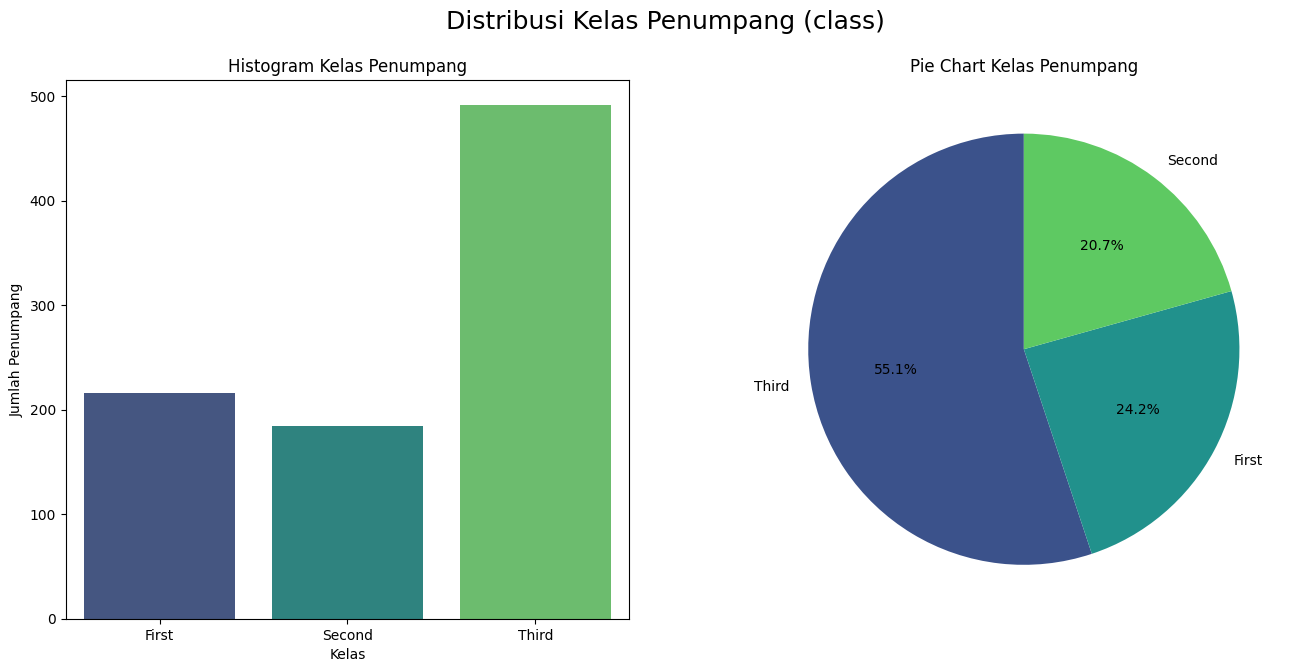

/tmp/ipython-input-1610702155.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], data=titanic, x='pclass', palette='plasma')


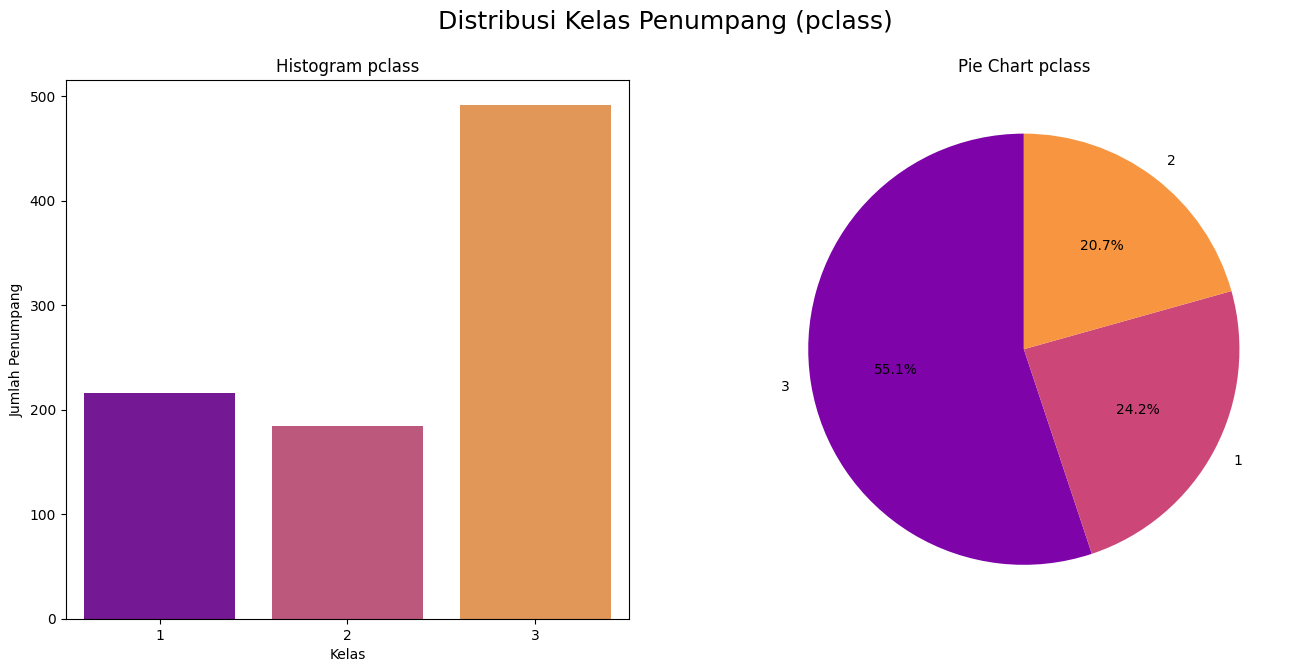

/tmp/ipython-input-1610702155.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='embark_town', palette='crest')


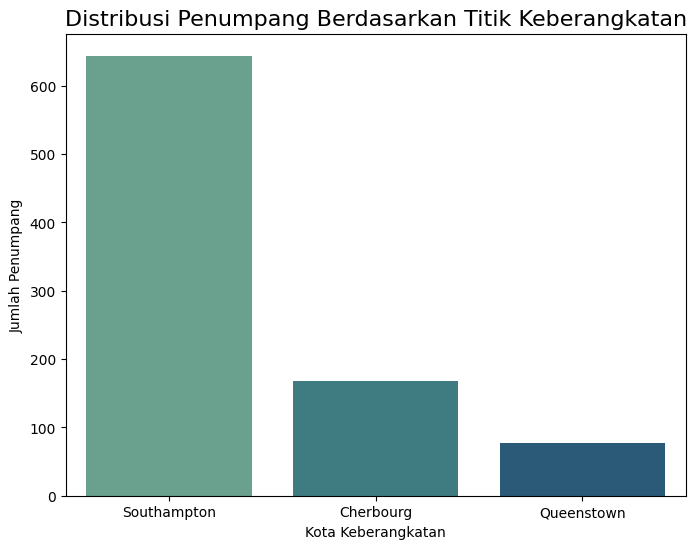

/tmp/ipython-input-1610702155.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='who', palette='magma')


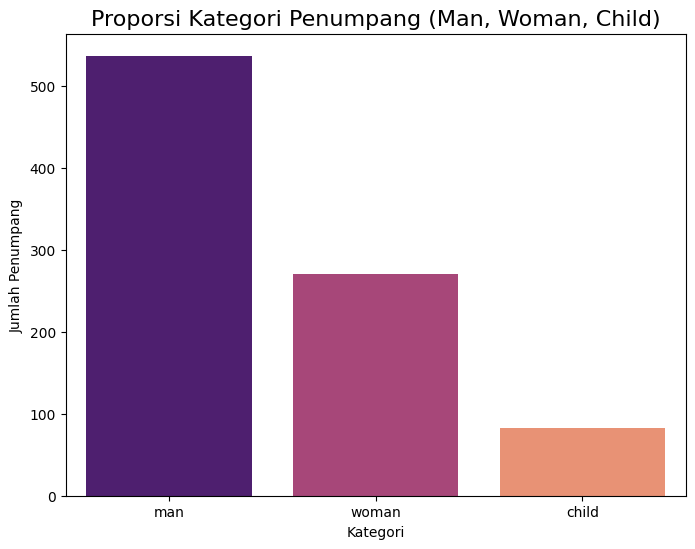

/tmp/ipython-input-1610702155.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=titanic, x='sex', y='age', palette='pastel')


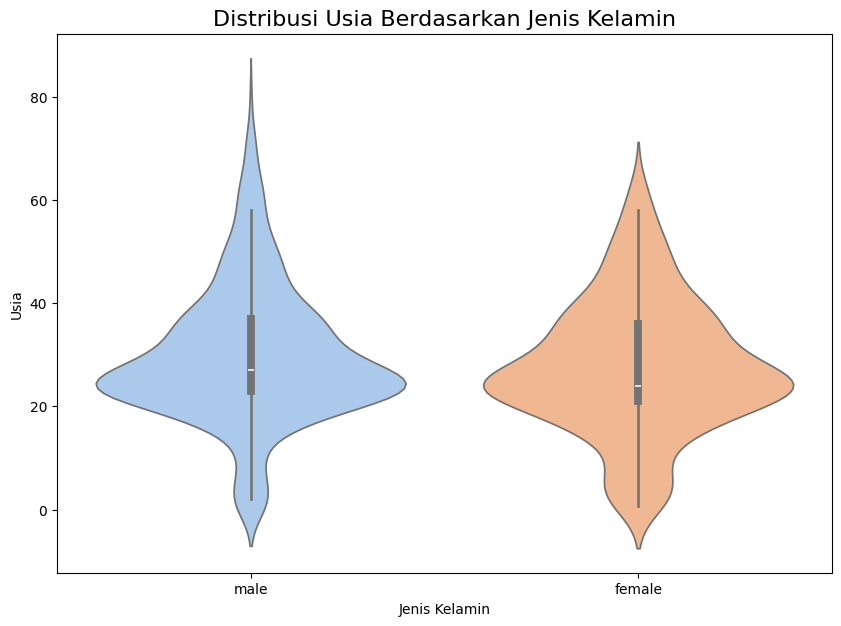

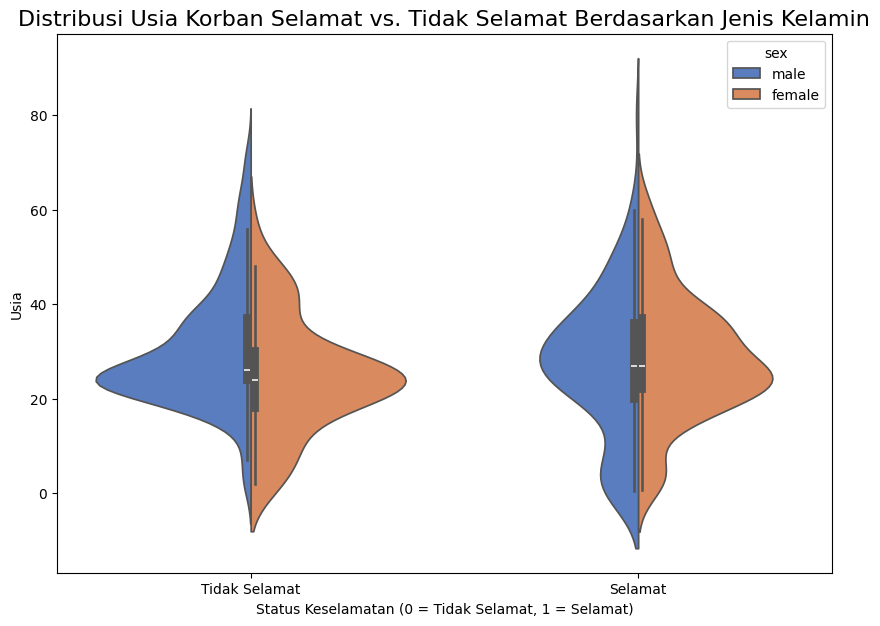

In [14]:
# 6. Visualisasi Data Kategorikal
# --- Distribusi Kelas Penumpang (class) ---
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Distribusi Kelas Penumpang (class)', fontsize=18)
sns.countplot(ax=axes[0], data=titanic, x='class', palette='viridis', order=['First', 'Second', 'Third'])
axes[0].set_title('Histogram Kelas Penumpang')
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah Penumpang')

class_counts = titanic['class'].value_counts()
axes[1].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', 3))
axes[1].set_title('Pie Chart Kelas Penumpang')
axes[1].set_ylabel('')

plt.savefig('distribusi_class.png')
plt.show()

# --- [DITAMBAHKAN] Distribusi Kelas Penumpang (pclass) ---
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Distribusi Kelas Penumpang (pclass)', fontsize=18)

# Histogram untuk pclass
sns.countplot(ax=axes[0], data=titanic, x='pclass', palette='plasma')
axes[0].set_title('Histogram pclass')
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah Penumpang')

# Pie Chart untuk pclass
pclass_counts = titanic['pclass'].value_counts()
axes[1].pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('plasma', 3))
axes[1].set_title('Pie Chart pclass')
axes[1].set_ylabel('')

plt.savefig('distribusi_pclass.png')
plt.show()

# --- Distribusi Titik Keberangkatan (embark_town) ---
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x='embark_town', palette='crest')
plt.title('Distribusi Penumpang Berdasarkan Titik Keberangkatan', fontsize=16)
plt.xlabel('Kota Keberangkatan')
plt.ylabel('Jumlah Penumpang')
plt.savefig('distribusi_embark_town.png')
plt.show()

# --- Proporsi Kategori Penumpang (who) ---
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x='who', palette='magma')
plt.title('Proporsi Kategori Penumpang (Man, Woman, Child)', fontsize=16)
plt.xlabel('Kategori')
plt.ylabel('Jumlah Penumpang')
plt.savefig('distribusi_who.png')
plt.show()

# --- Gender & Age (Violinplot) ---
plt.figure(figsize=(10, 7))
sns.violinplot(data=titanic, x='sex', y='age', palette='pastel')
plt.title('Distribusi Usia Berdasarkan Jenis Kelamin', fontsize=16)
plt.xlabel('Jenis Kelamin')
plt.ylabel('Usia')
plt.savefig('violin_gender_age.png')
plt.show()

# --- Gender & Survival (Violinplot) ---
plt.figure(figsize=(10, 7))
sns.violinplot(data=titanic, x='survived', y='age', hue='sex', split=True, palette='muted')
plt.title('Distribusi Usia Korban Selamat vs. Tidak Selamat Berdasarkan Jenis Kelamin', fontsize=16)
plt.xlabel('Status Keselamatan (0 = Tidak Selamat, 1 = Selamat)')
plt.ylabel('Usia')
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])
plt.savefig('violin_gender_survival.png')
plt.show()

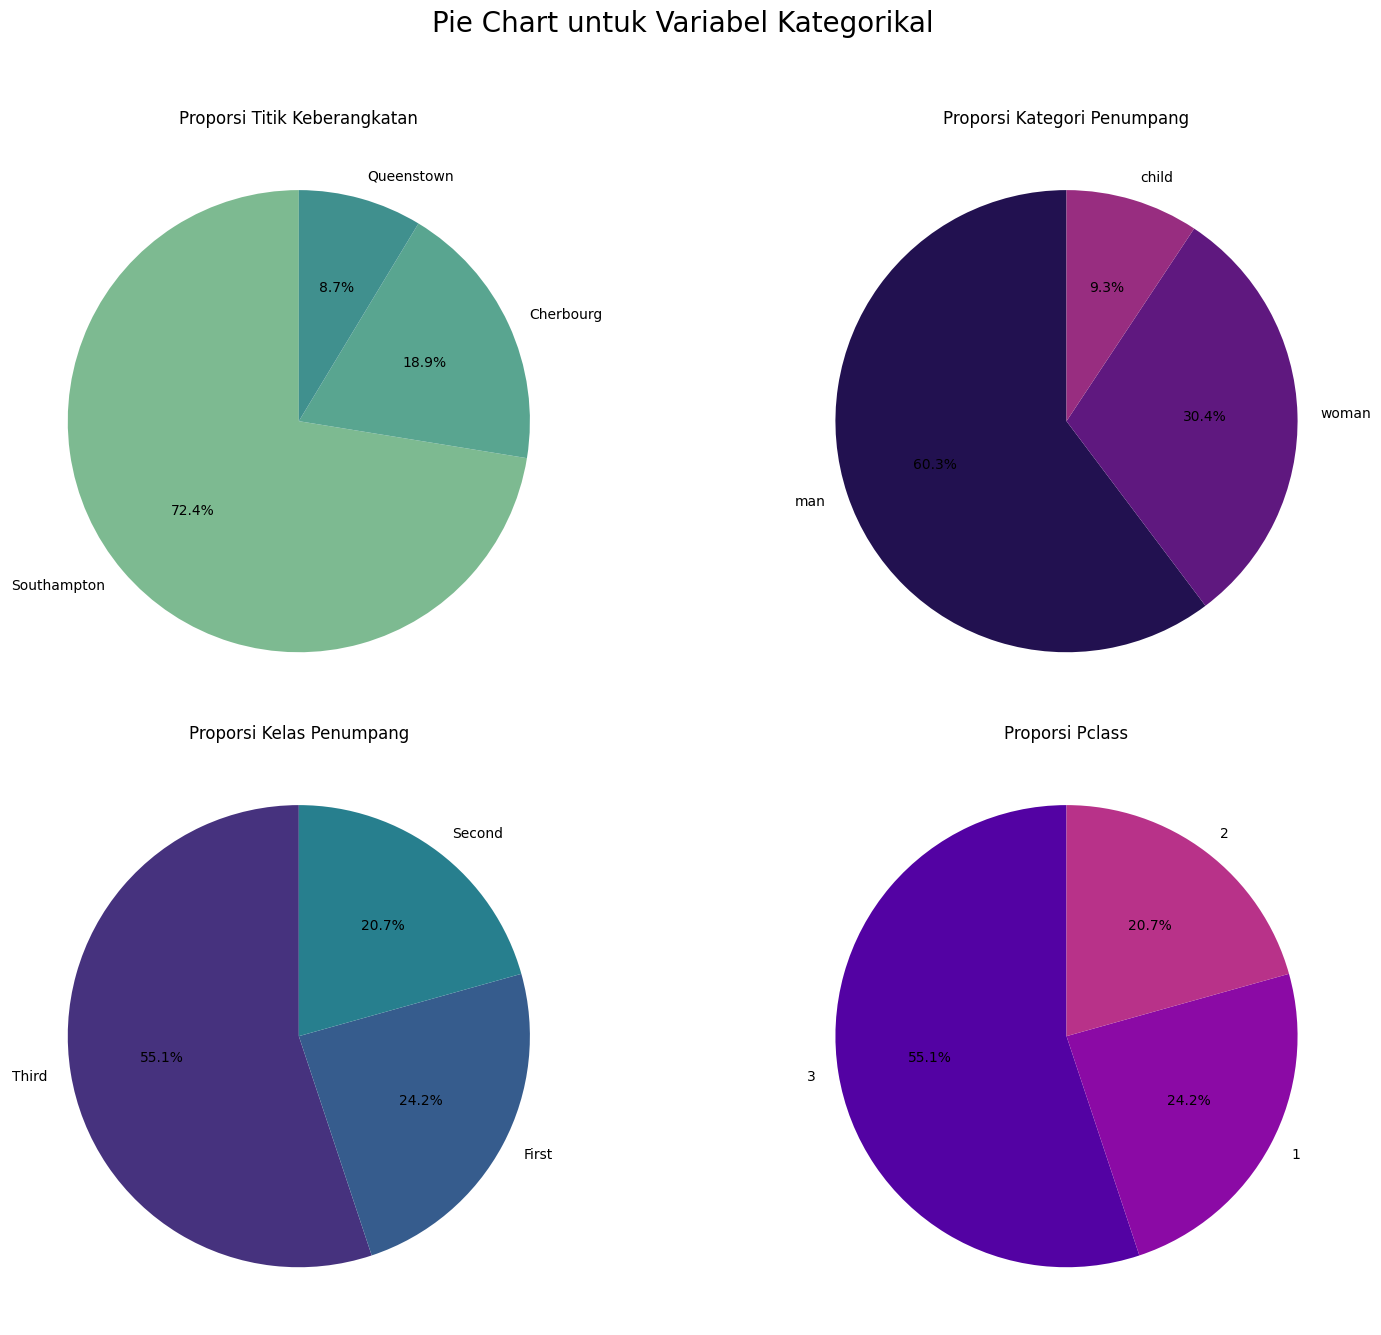

In [15]:
# 7. Visualisasi Khusus (Pie Charts)
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Pie Chart untuk Variabel Kategorikal', fontsize=20)

# Pie Chart untuk 'embark_town'
embark_counts = titanic['embark_town'].value_counts()
axes[0, 0].pie(embark_counts, labels=embark_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('crest'))
axes[0, 0].set_title('Proporsi Titik Keberangkatan')

# Pie Chart untuk 'who'
who_counts = titanic['who'].value_counts()
axes[0, 1].pie(who_counts, labels=who_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('magma'))
axes[0, 1].set_title('Proporsi Kategori Penumpang')

# Pie Chart untuk 'class'
class_counts = titanic['class'].value_counts()
axes[1, 0].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
axes[1, 0].set_title('Proporsi Kelas Penumpang')

# Pie Chart untuk 'pclass'
pclass_counts = titanic['pclass'].value_counts()
axes[1, 1].pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('plasma'))
axes[1, 1].set_title('Proporsi Pclass')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('pie_charts_kategorikal.png')
plt.show()